# Project: Optimal Placement of Solar Panels

## Introduction

> A homeowner near DTU wants to install solar panels on his detached house with a flat roof. He thinks he should orient them towards the south but is unsure about the angle the panel should form with the roof. In this project, you are to find the optimal angle for the homeowner's solar panels. The goal of the project is to develop a model and a Python program that, given the location on Earth (latitude and longitude), can calculate the optimal angle for the installation of solar panels under a set of simplifying assumptions. Data from the calendar year 2024 will be used for simulation. You will begin by modeling the movement of the sun in the sky using the Python package *[pvlib](https://pvlib-python.readthedocs.io/en/stable/index.html)*. Then, you will establish a model for the solar panel's energy production, which does not account for clouds and the atmosphere. The sun is modeled as a vector field of parallel vectors. To calculate the energy production, you must be able to integrate the flux of the vector field through the solar panel surface. Initially, we assume the panel is flat, but you will subsequently generalize your model. One possibility for generalization is as follows: Find a suitable surface in the urban environment around DTU that can be equipped with thin, flexible solar panel films (like https://www.youtube.com/watch?v=TS9ADU0oc50) and calculate the energy production from such solutions.

### Preparation

- Orthogonal projections, Section 2.3 
- Spherical coordinates (Example 6.6.1) and the horizontal coordinate system (https://en.wikipedia.org/wiki/Horizontal_coordinate_system) 
- Surfaces and normal vector, Section 7.1
- Vector fields and flux, Sections 7.2 and 7.5

## About the Project

### Project Purpose

The overall goal of the project is to create a Python program that, given a specified location on Earth (latitude and longitude), can calculate the optimal angle for solar panels.

### Optimality

"Optimal" can mean many things in this context:

- Greatest annual energy production. This is the optimality criterion we use unless otherwise specified. 
- Requirement for a certain daily minimum output (e.g., during winter).
- Lowest total energy costs for the residence. This should include consumption patterns, selling energy to the grid, potential electric vehicle usage, etc.
- Etc.

### Theory: Model and Assumptions

Solar energy is the conversion of energy from sunlight into electricity using solar cells (photovoltaic (PV) cells). The production of power by solar panels depends on the size of the installation (the number of panels), the individual efficiency of the panels, their placement, and, of course, weather conditions.

Solar irradiance, or solar irradiance, is the power per unit area (surface power density) received from the sun in the form of electromagnetic radiation in the instrument's wavelength range. Solar irradiance is measured in watts per square meter ($\mathrm{W/m^2}$) in SI units. Solar radiation has different wavelengths, such as UV radiation, which collectively are called the spectrum of radiation.

The *average* annual solar radiation arriving at the top of the Earth's atmosphere is about $1361 \,\mathrm{W/m}^2$. When the sun's rays have passed through the atmosphere, the total radiation (irradiance) in Denmark is approximately $S_0 := 1100 \,\mathrm{W/m^2}$ on a clear day at noon. The spectrum also changes through the atmosphere; for example, the shortest UV radiation (below 280 nanometers) rarely reaches the Earth's surface, but we will ignore such spectral changes.

With a good approximation, one can assume a linear relationship between the solar irradiance and the current output of the solar panel, and we will use this approximation. However, since the temperature in practice increases with increased irradiance, and the voltage decreases with increased temperature, the effect will not increase entirely linearly. The sun's rays are modeled as a vector field $\pmb{V}_S$ of parallel vectors of length $S_0$. Let's assume that the solar panel is described by a surface $\mathcal{F} = \pmb{r}(\Gamma)$, where $\pmb{r} : \Gamma \to \mathbb{R}^2$, $\Gamma = [a_1,b_1] \times [a_2,b_2]$, is a parameterization of the surface. The energy production for a solar cell depends on the angle between the surface's normal vector $\pmb{n}_\mathcal{F}$ and the solar rays. If the solar rays are parallel to the normal vector, the solar power is maximum, while if the solar rays are perpendicular to the normal vector, the power is zero. The solar power per unit area at the point $\pmb{r}(u,v)$, where $(u,v) \in \Gamma$, is the projection of the solar rays onto the surface's unit normal vector:

\begin{equation*}
   \left\langle \pmb{V}, \frac{\pmb{n}_\mathcal{F}(u,v)}{\Vert \pmb{n}_\mathcal{F}(u,v) \Vert} \right\rangle 
\end{equation*}

The total effect is obtained by integrating this quantity over the entire surface, which corresponds to the flux of $V$ through the surface $\mathcal{F}$.

\begin{equation*}
   \int_{\Gamma} \langle \pmb{V}, \pmb{n}_\mathcal{F}(u,v) \rangle \mathrm{d}(u,v) 
\end{equation*}

If $\langle \pmb{V}, \pmb{n}_\mathcal{F}(u,v) \rangle < 0$, it means that the sun is shining on the backside of the solar panel, and thus the power should be set to zero (the power can never be negative).

Here we specify our **standard assumptions**, which are used unless otherwise stated:

- The panel is flat and fixed.
- We assume that the maximum irradiance/insolation from the sun on the solar panel is $S_0 = 1100 \,\mathrm{W/m^2}$. All vectors in the sun's vector field $\pmb{V}: \mathbb{R}^3 \to \mathbb{R}^3$ are parallel and have a magnitude of $S_0$.
- The power output of the solar panel depends linearly on the solar irradiance and the flux of the sun's vector field through the surface of the solar panel.
- Solar panel efficiency: At a flux of 1000 W per $\,\mathrm{m^2}$, the panel delivers $Wp/(L B)$ per $\,\mathrm{m^2}$, where $Wp$ is the panel's peak power watts (STC), $L$ is the length, and $B$ is the width.
- Cloud cover and other atmospheric disturbances are not modeled but are set to an average value: we assume these disturbances halve the sun's energy throughout the year: $S_0 A_0 = 550 \,\mathrm{W/m^2}$, where the factor is $A_0 = 0.5$.

In the final part of the project, there will be an opportunity to revisit these assumptions and investigate whether/how they can be replaced with better assumptions.

## Initial Exercises

> Find through literature search the recommended angle at which solar panels are installed in Denmark. The angle is said to be zero degrees if the panel lies flat on the ground (or roof).

> Select a type of solar panel. You can search for installers in Denmark and investigate which panels they typically use, or you can google "solar panel datasheet" or similar. The solar panel should be a standard panel (flat and not curved, for example). Find a datasheet for the chosen solar panel, and describe the panel's size (using $L$ for length and $B$ for width) and indicate Wp/Pmax (referred to as max power, peak power watts, or similar) under the STC standard. Describe what the STC standard entails. Calculate $Wp/(L B)$ (according to the list of standard assumptions above). Assume ideal conditions: the sun is perpendicular to the solar panel, and the solar irradiance is $1100 W/m^2$ for an entire hour. How many joules and kilowatt-hours does the panel deliver in this hour? How many watt-hours is this per $m^2$?


Solar PV panels come in a variety of different technologies and sizes, so it is important to be able to compare them fairly to one another. International standards have been developed to do just that, and the electrical ratings displayed on solar panel datasheets follow these standards.
Standard Test Conditions (STC) are the industry standard conditions under which all solar PV panels are tested to determine their rated power and other characteristics. When a panel is advertised as having a capacity of 350Wp for example, this is the power it is expected to produce under STC. Since all manufacturers follow this same standard, it gives a fair basis to compare them against each other.
Conditions from IEC 61538:
-Cell temperature: 25°C
-Irradiance: 1000 W/m²
-Air mass: 1.5


> Your final report should also include an introductory section where you describe solar energy and solar cells. You determine what exactly the section should contain, but the sources below can be used to find information. It is recommended to write this section first once you have progressed further with the project. 

1. https://www.pveducation.org/
1. https://www.acs.org/education/resources/highschool/chemmatters/past-issues/archive-2013-2014/how-a-solar-cell-works.html

Since the panel is flat, the unit normal vector $\pmb{u}_p$ is constant (and has length 1), where:

\begin{equation*}
\pmb{u}_p = \frac{\pmb{n}_{\mathcal{F}}(u,v)}{\Vert \pmb{n}_\mathcal{F}(u,v) \Vert}.
\end{equation*}

> Provide a formula or expression for the flux through the surface expressed in terms of $A_0$, $\pmb{u}_p, \pmb{V}, L$, and $B$. We define the flux to be zero if the angle between $\pmb{u}_p$ and $\pmb{V}$ is greater than $\pi/2$ (90 degrees), as we do not want negative flux. Your expression should account for this.

*Hint*: Since the normal vector is constant, you can get rid of the integral sign.


The flux determines the instantaneous power for the panel for a specific direction of the sun's rays $\pmb{V}$ and for a specific panel orientation determined by $\pmb{u}_p$. To find the total energy production for a solar panel, we need to be able to model the movement of the sun relative to the panel. This is modeled using a Solar Position Algorithm (SPA) from the Python package `pvlib`, but before we get to that point, we need to develop some tools in NumPy.

> Provide SI units for $\pmb{V}$, $L$, $B$, $A_0$, flux, and energy. Specify the relationship between $\mathrm{J}$ and $\mathrm{kWh}$.

## NumPy

In the project, we need to be able to find minimum, maximum, and/or zero points as NumPy arrays, so we start by familiarizing ourselves with this. We consider a simple function $f: [0, 2 \pi] \to \mathbb{R}$ given by $f(x) = \cos(x)$ and want to determine its minimum, maximum, and zero points. However, in the project, we won't have the actual function or its functional expression, but only a (long) array of function values, for example, $f(t_n)$ for $t_n = 2\pi n/N$ for $n = 0,1, \dots, N-1$. Here we perceive $\Delta t_n = 2 \pi/N$ as the distance between our time samples. In NumPy:

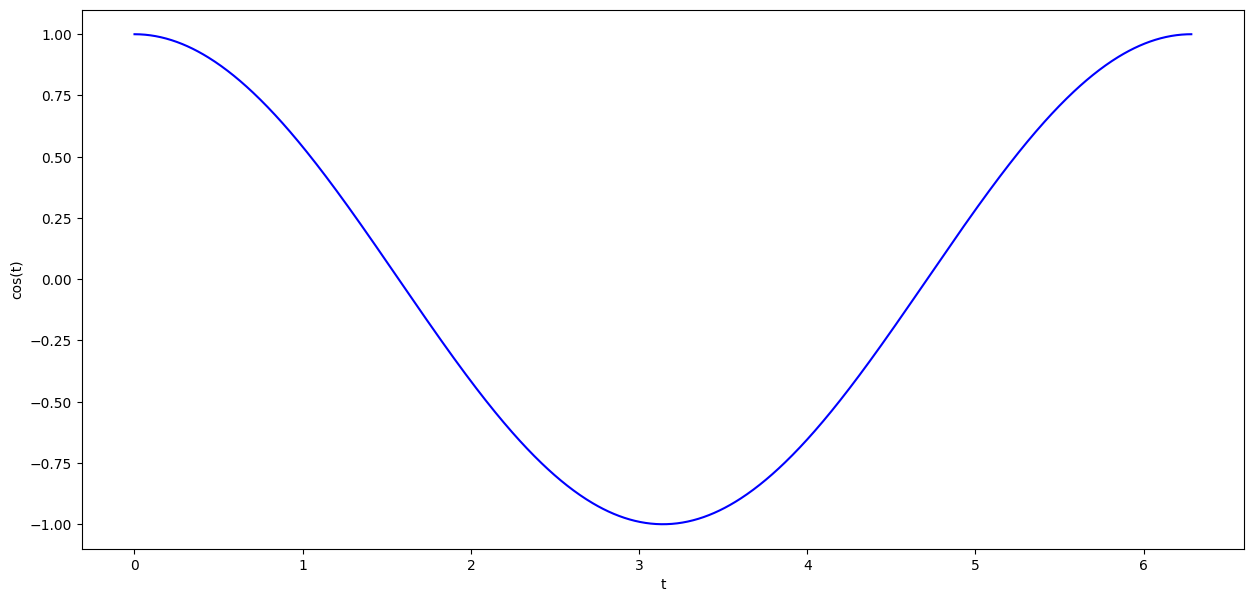

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
figuresize = (15, 7)

t = np.linspace(0, 2 * np.pi, 1000)
f = np.cos(t)

plt.figure(figsize=figuresize)
plt.plot(t, f, color='b', linestyle='-')
plt.xlabel('t')
plt.ylabel('cos(t)')
plt.show()

# print(t,f)  # uncomment to see the values of t and f

We perceive `t` and `f` as *vectors* of variable and function values, respectively. NumPy has many built-in methods that can be useful, such as

In [3]:
f.max(), f.min(), f.argmax(), f.argmin(), t[f.argmax()], t[f.argmin()]

(1.0, -0.9999950553174459, 0, 499, 0.0, 3.138447916198812)

One can also inquire about which function values, for example, are less than $-0.95$:

In [4]:
idx = f < -0.95
f[idx], t[idx]

# Or in one line
f[f < -0.95], t[f < -0.95]

(array([-0.95192731, -0.95383508, -0.95570513, -0.95753737, -0.95933173,
        -0.96108814, -0.96280654, -0.96448685, -0.96612901, -0.96773295,
        -0.96929861, -0.97082592, -0.97231483, -0.97376528, -0.97517722,
        -0.97655057, -0.9778853 , -0.97918134, -0.98043865, -0.98165717,
        -0.98283687, -0.98397768, -0.98507957, -0.9861425 , -0.98716641,
        -0.98815128, -0.98909706, -0.99000371, -0.9908712 , -0.99169949,
        -0.99248855, -0.99323836, -0.99394887, -0.99462007, -0.99525192,
        -0.9958444 , -0.99639749, -0.99691116, -0.9973854 , -0.99782019,
        -0.9982155 , -0.99857133, -0.99888765, -0.99916446, -0.99940175,
        -0.99959951, -0.99975772, -0.99987639, -0.9999555 , -0.99999506,
        -0.99999506, -0.9999555 , -0.99987639, -0.99975772, -0.99959951,
        -0.99940175, -0.99916446, -0.99888765, -0.99857133, -0.9982155 ,
        -0.99782019, -0.9973854 , -0.99691116, -0.99639749, -0.9958444 ,
        -0.99525192, -0.99462007, -0.99394887, -0.9

where we also specify the corresponding time values in the `t` vector.

> Write Python code that finds all function values in `f` in the interval $[-0.05, 0.05]$ and indicates the corresponding `t` values. 

In [5]:
idx = (f < 0.05) & (f > -0.05)
f[idx], t[idx]

(array([ 0.04872413,  0.0424412 ,  0.0361566 ,  0.02987056,  0.02358334,
         0.01729519,  0.01100636,  0.00471709, -0.00157237, -0.00786176,
        -0.01415085, -0.02043937, -0.02672708, -0.03301374, -0.03929909,
        -0.04558289, -0.04558289, -0.03929909, -0.03301374, -0.02672708,
        -0.02043937, -0.01415085, -0.00786176, -0.00157237,  0.00471709,
         0.01100636,  0.01729519,  0.02358334,  0.02987056,  0.0361566 ,
         0.0424412 ,  0.04872413]),
 array([1.5220529 , 1.52834237, 1.53463185, 1.54092132, 1.5472108 ,
        1.55350027, 1.55978975, 1.56607922, 1.5723687 , 1.57865817,
        1.58494765, 1.59123712, 1.59752659, 1.60381607, 1.61010554,
        1.61639502, 4.66679029, 4.67307976, 4.67936924, 4.68565871,
        4.69194819, 4.69823766, 4.70452714, 4.71081661, 4.71710609,
        4.72339556, 4.72968504, 4.73597451, 4.74226399, 4.74855346,
        4.75484294, 4.76113241]))

> Write a Python function that can find both sign changes (zero crossings) of `f`.

Check that the found zero crossings reasonably align with the exact zeros for $f$. Your method should be simple and also work on "vectors" `np.array([3, 0.5, 0.1,-0.5, -1, -0.5, 0.5, 2])` where we don't know the function behind the function values. In particular, your method should not use any other knowledge about $\cos$ (such as its differentiability) than the information you have in the `f` vector.

You can find inspiration in the bisection method (which you encountered in Mathematics 1a in the fall), or you can find inspiration in NumPy functions `np.where`, `np.diff`, `np.sign`, or the following Python plot:

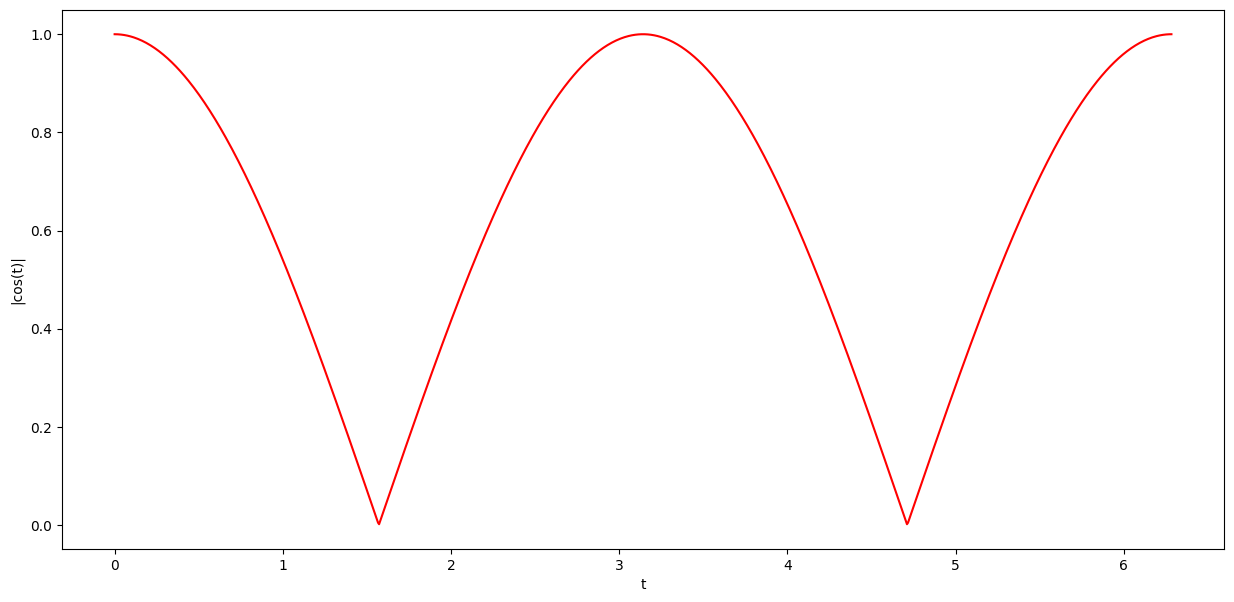

In [6]:
plt.figure(figsize=figuresize)
plt.plot(t, np.abs(f), color="r")  # linestyle='-', marker='.'
plt.xlabel("t")
plt.ylabel("|cos(t)|")
plt.show()

Finding the zero values:

In [7]:
sign_changes = np.where(np.diff(np.sign(f)))[0] #finds index of sign change
f[sign_changes], t[sign_changes]

(array([ 0.00471709, -0.00157237]), array([1.56607922, 4.71081661]))

## Solar Position Model

### Coordinate System

To be able to calculate, for example, the movement of the sun and the projection of the sun's rays onto the panel's normal vector, we need to introduce (at least) an appropriate coordinate system. We choose to place a fixed center (origin) $(0,0,0)$ at the panel's position. We then imagine the tangent plane to the Earth at the panel's position. The normal vector to this tangent plane will be our $z$-axis. The $x$-axis and $y$-axis thus "span" the tangent plane. We define the coordinate system such that the $x$-axis points north and the $y$-axis points east. The attentive reader will have noticed that this is a left-handed coordinate system. However, this is the tradition, and the coordinate system is called the horizontal coordinate system (https://en.wikipedia.org/wiki/Horizontal_coordinate_system). So now we have a reference solar position system that focuses on the observer (the panel) at a given latitude and longitude on the Earth's surface. Let's summarize:

1. The coordinate system has its center at the solar panel (called the observer). It is traditional to use a left-handed coordinate system where the $x$-axis points north, the $y$-axis points east, and the $z$-axis points toward the zenith point in the direction of the normal vector to the tangent plane. The coordinate system is called the horizontal coordinate system because it is oriented according to the observer's local horizon.
2. Any object can be described in the horizontal coordinate system either in Cartesian coordinates $(x,y,z)$ or spherical coordinates $(r,\theta,\phi)$. Here, $ \phi \in [0,2\pi]$ is the azimuth angle measured from the $x$-axis towards the $y$-axis, $ \theta \in [0,\pi]$ is the zenith angle from the $z$-axis, and $r$ is the radius.
3. The horizontal coordinate system is fixed to a location on Earth, not the stars or the sun. Objects in the starry sky are imagined to be located on the celestial sphere at a fixed distance, and their position is described by azimuth and zenith angles (radius is thus ignored in this type of description). Over time, the zenith and azimuth angles for an object in the sky (such as the sun) will change as the object appears to move across the sky due to the Earth's rotation. Since the horizontal coordinate system is defined by the observer's local *horizon*, the same object seen from different locations on Earth at the same time will have different values of azimuth and zenith.

![Source: https://assessingsolar.org/notebooks/solar_position.html](solar_position_system.png)

We measure the angles either in radians $(\theta, \phi) \in [0, \pi] \times [0, 2\pi]$ or degrees $(\theta,\phi) \in [0, 180^\circ] \times [0, 360^\circ]$. Another commonly used angle is the solar elevation angle ($\alpha$), which is complementary to the zenith solar angle ($\alpha = 90^\circ - \theta$), measuring the angle from the horizontal plane towards the $z$-axis.

> Write a Python function `def solar_elevation_angle(theta)` that, given $\theta$ in degrees, calculates $\alpha$ in degrees.

In [8]:
def solar_elevation_angle(theta):
    return 90 - theta

If the angles are given in radians, we can use `solar_elevation_angle` together with `np.deg2rad` and `np.rad2deg`. Therefore, we don't need to create functions for both degrees and radians, as we can easily reuse our functions. If, for example, we want to calculate in radians here:

In [9]:
theta_in_rad = np.pi / 3 # zenith angle given in radians
print(np.pi / 2. - theta_in_rad) # elevation angle given in radians
# elevation angle given in radians
np.deg2rad(solar_elevation_angle(np.rad2deg(theta_in_rad))) 

0.5235987755982989


0.523598775598299

It is recommended to continue calculations in radians but to present results/angles in degrees if this is more meaningful/descriptive. Also note that we do not need to use `solar_elevation_angle` in the following, as both zenith and elevation angles will be available.

In the horizontal coordinate system, any object on the *celestial sphere* is completely determined by the zenith angle ($\theta$) and the azimuth angle $\phi$. As mentioned, the radial coordinate is ignored when all objects are placed on the celestial sphere. However, we can still include the radial coordinate:

> Suppose the sun has a fixed distance $r_s$ to the Earth. Find a reasonable value for $r_s$. Provide a (mathematical) expression for how the sun's $xyz$-coordinates can be calculated from $r_s$, $\theta_s$, and $\phi_s$, where $\theta_s$ and $\phi_s$ are respectively the zenith and azimuth angles for the sun's position.

In [10]:
import numpy as np #(this cell for calculating coordinates of the sun is correct)

theta_in_rad = np.pi / 3 # zenith angle given in radians
phi_in_rad = np.pi / 6 # azimuth angle given in radians

r_s = 149597870700  # distance from the Earth to the Sun, in meters, since all the other values use meters as the unit for distance
theta_s = np.deg2rad(solar_elevation_angle(np.rad2deg(theta_in_rad)))
phi_s = np.deg2rad(solar_elevation_angle(np.rad2deg(phi_in_rad)))  # azimuth angle, in radians

x_s = r_s * np.sin(theta_s) * abs(np.cos(phi_s))
y_s = r_s * np.sin(theta_s) * abs(np.sin(phi_s))
z_s = r_s * np.cos(theta_s)

print(f"The sun's coordinates are ({x_s}, {y_s}, {z_s})")
print('The length to the sun is:', np.sqrt(x_s**2+y_s**2+z_s**2))

The sun's coordinates are (37399467675.000015, 64777778189.12988, 129555556378.25974)
The length to the sun is: 149597870700.0


A (flat) solar panel is placed at the origin of the coordinate system. The unit normal $\pmb{u}_p \in \mathbb{R}^3$ to the solar panel has zenith angle $\theta_p$ and azimuth angle $\phi_p$. We consider a normalized/unit solar vector $\pmb{u}_{s} \in \mathbb{R}^3$ given by $(\theta_s, \phi_s)$. Thus, the sun's vector field is given by $\pmb{V} = S_0 \pmb{u}_{s}$.

> Provide a (mathematical) expression for $\pmb{u}_p$ and for $\langle \pmb{u}_{s}, \pmb{u}_p \rangle$ based on the zenith and azimuth angles. You should simplify the expression so that it contains $\cos(\theta_p-\theta_s)$ and only 5 trigonometric functions. Show that $-1 \le \langle \pmb{u}_{s}, \pmb{u}_p \rangle \le 1$. Explain in your own words what it means when $\langle \pmb{u}_{s}, \pmb{u}_p \rangle < 0$.


In [17]:
import numpy as np
theta_p = np.pi/4
phi_p = np.pi

# The unit normal vector to the solar panel expressed in terms of zenith and azimuth angles
x_up = np.sin(theta_p) * np.cos(phi_p)
y_up = np.sin(theta_p) * np.sin(phi_p)
z_up = np.cos(theta_p)

# The unit solar vector u_s can be expressed in terms of zenith and azimuth angles
x_us = np.sin(theta_s) * np.cos(phi_s)
y_us = np.sin(theta_s) * np.sin(phi_s)
z_us = np.cos(theta_s)

# The dot product of the two vectors is given by
u_p_u_s = x_up * x_us + x_up * y_us + z_up * z_us

# Substituting the values of the unit vectors, we get
u_p_u_s = np.sin(theta_s) * np.cos(phi_s) * np.sin(theta_p) * np.cos(phi_p) + np.sin(theta_s) * np.sin(phi_s) * np.sin(theta_p) * np.sin(phi_p) + np.cos(theta_p) * np.cos(theta_s)
# can be simplified using trigonometric identities cos(A-B) = cosAcosB + sinAsinB


u_p_u_s = np.sin(theta_s) * np.sin(theta_p) * (np.cos(phi_s - phi_p)) + np.cos(theta_s) * np.cos(theta_p)

#np.sin(theta_s) * np.sin(theta_p) -+ np.cos(theta_s) * np.cos(theta_p) = np.cos(theta_s +- theta_p)

# u_p = np.array([np.sin(theta_p) * np.cos(phi_p), np.sin(theta_p) * np.sin(phi_p), np.cos(theta_p)])
# u_s = np.array([np.sin(theta_s) * np.cos(phi_s), np.sin(theta_s) * np.sin(phi_s), np.cos(theta_s)])

# calculate the dot product
#u_p_u_s = np.dot(u_s, u_p)

sin(a)*sin(c)*cos(b - d) + cos(a)*cos(c)

The dot product between two unit vectors $u_s$ and $u_p$ is always between $-1$ and $1$ because it represents the cosine of the angle between the two vectors. In the context of unit vectors, the dot product formula simplifies to $u_s . u_p = |u_s||u_p|cos(θ) = cos(θ)$, because the magnitude of a unit vector is 1.

The range of the cosine function is $[-1, 1]$, which means the dot product of two unit vectors (which gives the cosine of the angle between them) will also always be in the range $[-1, 1]$. If the vectors are identical, the angle between them is 0 degrees, and $cos(0) = 1$. If the vectors are diametrically opposed, the angle is 180 degrees, and $cos(180)$ = -1. For any other angle, the cosine (and thus the dot product) will be between -1 and 1.

$\langle \pmb{u}_{s}, \pmb{u}_p \rangle < 0$ means that the angle between these two vectors $>$ 90 degrees and $\leq$ 180 degrees. In other words, the vectors are pointing in opposite directions. This is because the dot product of two unit vectors is equal to the cosine of the angle between them, and the cosine function is negative for angles $>$ 90 degrees and $\leq$ 180 degrees.

> Write a Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)` that returns $\langle \pmb{n}_{s}, \pmb{n}_p \rangle$ when it is positive and otherwise returns zero.


In [56]:
import numpy as np

def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel): #takes input as arrays of radians
    # calculate the unit vectors
    u_s = np.array([np.sin(theta_sun[0]) * np.cos(phi_sun[0]), np.sin(theta_sun[0]) * np.sin(phi_sun[0]), np.cos(theta_sun[0])])
    for n in range(1, len(theta_sun)):
        u_s = np.vstack([u_s, [np.sin(theta_sun[n]) * np.cos(phi_sun[n]), np.sin(theta_sun[n]) * np.sin(phi_sun[n]), np.cos(theta_sun[n])]])
    
    u_p = np.array([np.sin(theta_panel[0]) * np.cos(phi_panel[0]), np.sin(theta_panel[0]) * np.sin(phi_panel[0]), np.cos(theta_panel[0])])
    for n in range(1, len(theta_panel)):
        u_p = np.vstack([u_p, [np.sin(theta_panel[n]) * np.cos(phi_panel[n]), np.sin(theta_panel[n]) * np.sin(phi_panel[n]), np.cos(theta_panel[n])]])
    
    # calculate the dot product
    dot_product = np.array([np.dot(u_s[0], u_p[0])])
    for r in range(1, len(u_s)):
        dot_product = np.append(dot_product, np.dot(u_s[r], u_p[r]))

    # return the dot product if it's positive, or zero otherwise
    dot_product[dot_product < 0] = 0
    return dot_product

> Take another look at your Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Rewrite it so that it works on NumPy arrays of zenith and azimuth angles. You can test it on the following three situations, where the projection should yield $0.707107$, $0.0$, and $0.0$ (or rather, with numerical errors, it should give `array([7.07106781e-01, 6.12323400e-17, 0.0])`). Explain the orientation of the solar panel and the position of the sun in the three situations.



In [57]:
theta_sun = np.array([np.pi / 4, np.pi / 2, 0.0])
phi_sun = np.array([np.pi, np.pi / 2, 0.0])
theta_panel = np.array([0.0, np.pi / 2, np.pi])
phi_panel = np.array([np.pi, 0.0, 0.0])

solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)

array([7.07106781e-01, 6.12323400e-17, 0.00000000e+00])

### Solar Position Modelling via `pvlib`

In Python, the solar position angles, denoted as $(\theta_s, \phi_s)$, can easily be calculated at any location using the Solar Position Algorithm (SPA) with the `pvlib` package, which is implemented by default with the National Renewable Energy Laboratory's SPA algorithm [Reda and Andreas, 2003, https://www.nrel.gov/docs/fy08osti/34302.pdf]. We follow https://assessingsolar.org/notebooks/solar_position.html.

In [ ]:
import pandas as pd
import pvlib
from pvlib.location import Location

We first need to define the observer's/panel's geographical location. This is done using the object *pvlib.location.Location* in the library *[pvlib](https://pvlib-python.readthedocs.io/en/stable/index.html)*, where we need to specify latitude, longitude, time zone, and altitude, among other parameters. For simulation, data for $(\theta_s, \phi_s)$ from, for example, the calendar year 2024 is used, but here in this initial exercise, we'll suffice with data for the current month, April 2024.

In [ ]:
timezone = "Europe/Copenhagen"
start_date = "2024-04-01"
end_date = "2024-04-30"
delta_time = "Min"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.660439, 12.604980, timezone, 10, "Amager (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", closed="left", freq=delta_time, tz=timezone
)

> Choose a location for your solar panel, for example, DTU. Update the above GPS coordinates (measured in DecimalDegrees), altitude, and name to match the chosen location.

We can now determine the solar position based on the horizontal coordinate system location in `site` for the specified time interval with the following call:

In [ ]:
# Estimate Solar Position with the 'Location' object
sunpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
sunpos.head()

We see that the DataFrame contains the solar position for each minute in April 2024. The time sampling $\Delta t$ can be controlled by `delta_time = "Min"` (minute) set above. When we later need to calculate the energy production for the entire year 2024, it may be sufficient to know the solar position for each hour (for the whole year 2024), as the DataFrame will become very large if we use `delta_time = "Min"` for a whole year. This is handled by `delta_time = "H"` (hour). Note that `delta_time = "M"` (month) sets $\Delta t$ to a month (which is too large for our needs).

After the solar angles are estimated using `pvlib`, they can be visualized, for example, for April 1st:

In [ ]:
import matplotlib.dates as mdates

chosen_date = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + chosen_date)

# plot for solar zenith angle
ax1.plot(sunpos.loc[chosen_date].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(sunpos.loc[chosen_date].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

Note that the $x$-axis uses the UTC time zone, so you need to add $+2$ to get Danish time. The plotted vectors can be printed:

In [ ]:
chosen_date = "2024-04-01"
print(sunpos.loc[chosen_date].zenith)
print(sunpos.loc[chosen_date].elevation)
print(sunpos.loc[chosen_date].azimuth)

Here we have chosen to plot the solar angles for April 1st.

> Plot the zenith, azimuth, and elevation angles of the sun, i.e., $\theta_s, \phi_s, \alpha_s$, for the entire day of April 20, 2024, as a function of time.


**Recommendation:** In the following, we will need to work with vectors of, for example, zenith and azimuth angles, especially being able to find maximum values, zero crossings, integrate, etc. Therefore, it is recommended to work with the data from `sunpos` as NumPy arrays. This can be done by, for example:

In [ ]:
np.array(sunpos.loc[chosen_date].elevation)

> Plot the elevation angle of the sun and determine when the sun is highest during the day on April 20, 2024. Explain what it means when $\alpha_s < 0$ or $\theta_s > 90^\circ$.

> Find the time of sunrise and sunset at DTU on April 20, 2024. Compare with "known" values such as those from DMI. *Hint:* If you want precise values, you should use `apparent_elevation` (apparent sun elevation accounting for atmospheric refraction) instead of `elevation`. You do not need to account for the curvature of the Earth.


> Find the highest point of the sun in the sky (in degrees) on the summer solstice at DTU, and when during the day it occurs? *Hint:* You will need to change the start and end dates for the `sunpos` object.

> Create a Python function that can calculate the highest point of the sun $\alpha_{max}$ in the sky (in degrees) on a given date (year-month-day) at a given location (e.g., city) specified by latitude and longitude. *Hint:* The answer should not depend on longitude, as the highest point of the sun in the sky depends only on latitude.

In a previous task, you found an expression for the sun's $xyz$ coordinates from $r_s$, $\theta_s$, and $\phi_s$.

> Write a Python function (for use with NumPy arrays) that converts from the sun's zenith and azimuth to the sun's position given in $xyz$ coordinates. Remember whether you are working in radians or degrees. The `np.deg2rad()` function may be useful. It's fine to use an approximate value for $r_{s}$, but you can find a more accurate value with: `pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700`, where `149597870700` is the number of meters in an astronomical unit (AU).

> Write a Python function that converts from the sun's position in the sky to zenith and azimuth (in degrees or radians) in $xyz$ coordinates. The `np.arctan2(y, x)` and `np.rad2deg()` functions may be useful.

## Power and Energy Calculations 

**Recommendation:** It is recommended to work with everything in radians. Remember that you can use `np.deg2rad` or `np.rad2deg`. If you have angles in degrees, you should use `np.rad2deg`.

We consider April 20th. `sunpos` contains solar position data for every minute throughout the day. Since there are 1440 minutes in a day, solar position angles over this day are described by a vector of this length, for example:

In [ ]:
sunpos.loc[chosen_date].zenith

We only consider $\theta_p \in [0, \pi/2]$, as $\theta_p > \pi/2$ corresponds to tilting the panel with the back facing upwards.

> Create a Python function that can calculate the flux of the sun's vector field through the solar panel's surface for each minute throughout the day. You should use `solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Remember to only include solar zenith angles $\theta_s \in [0, \pi/2]$ (why?) so that the panel's flux is zero if the $\theta_s$ values (in a vector like `sunpos.loc[chosen_date].zenith`) are above $\pi/2$, i.e., 90 degrees.

To find the energy production from the solar panel, we need to integrate the flux (i.e., the power) over the considered time period. We always work in SI units, but you should provide final results (such as the total energy production) in relevant units (for example, both in joules and $\mathrm{kWh}$). For integration, we can use the Trapezoidal rule known from Mathematics 1b. You can use your own implementation of the Trapezoidal rule if you prefer, but here we choose to use Simpson's rule (https://en.wikipedia.org/wiki/Simpson%27s_rule) from the SciPy package. The energy production can be specified per $\mathrm m^2$ of the panel. Remember to include the efficiency of the solar panel (regarding the flux) as described in the standard assumptions.

In [ ]:
from scipy import integrate
flux = np.array(...)  # From the previous task

# Remember to take into account the efficiency of the panel, according to the standard assumptions.

# dx=60 since there are 60 s between time samples
integral_value = integrate.simps(..., dx=60)

integral_value

`flux` here is the vector (`np.array`) containing the flux calculated for each minute throughout the day. The parameter `dx=60` tells SciPy that the flux is sampled every minute (1 minute is 60 seconds in SI unit). If you later choose to use `delta_time = "H"` when calculating the energy production for a whole year, remember to inform `integrate.simps` about the changed time sampling, namely `dx=3600`.

> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for April 20th for each *integer* angle $\theta_p$ between 0 and 90 degrees.


## Optimal Angle

Now, let's finally consider the energy production for the entire year 2024. Call a new `sunpos` object with the relevant time interval.

> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for the entire year 2024 for each *integer* angle $\theta_p$ between 0 and 90 degrees.

> Find the optimal angle $\theta_p$ and indicate the energy production. How much less is the energy production if $\phi_p$ is, for example, $175^\circ$ or similar?

> Set up a realistic configuration of $X$ number of solar panels, where you choose $X$ according to a typical setup on a single-family house. Solar panels are set up at the optimal angle. Calculate the energy production for each day and plot this as a function of time (specified in days).

## Extensions

You must now choose to work further with *at least one* of the following extensions:

#### Solar Panel Film on a Curved Surface

Solar panel film (thin solar/power film) is a thin film that can be attached to various building surfaces and functions as a solar panel. Go on an excursion in the vicinity of DTU, find a non-planar surface in the urban environment suitable for mounting solar panel film. By a "non-planar" surface, we mean a curved surface where the surface's normal vector is not constant. It could be a roof of a bus shelter, the top floor of the Jægersborg water tower, etc. It should be a surface that you can parameterize. Set up a parameterization for the chosen building surface. Find a datasheet for a solar panel film that can reasonably be used on the selected building surface and provide the relevant data. Generalize your model and Python code to account for the fact that the solar panel's normal vector is not constant. Calculate the annual energy production for the solar panel film on the building component.

Since the normal vectors are no longer constant over the entire surface, you must now integrate the projection of $\pmb{V}$ onto the surface's unit normal vector over the entire surface. For this, you can use SciPy. Remember that the projection should be set to zero when it is negative. You should choose a surface where the shadow for the surface itself does not become too complicated to handle.

#### Include Shadow from a Tree or Building


In the horizontal coordinate system, place, for example, a tree crown at a given distance, such as $10 \,\mathrm m$. Consider the sphere $r_{tree}=10\,\mathrm m$ with the center at the Origin (the panel's position) and describe the tree's shape on this sphere. A simple model is as follows: Assume that there are only two possibilities: either $0\%$ shadow or $100 \%$ shadow. Calculate the surface area of the entire sphere as a function of $r_{tree}$, assume a size of the tree crown (e.g., its approximate diameter), and calculate approximately where the tree shades in zenith and azimuth degrees. This could be that there is $100 \%$ shadow when $\theta \in [70,80]$ and $\phi \in [150,160]$, and the energy intake must therefore be subtracted when the sun is in this interval. The shape of the tree becomes somewhat unnatural when using axis-parallel areas in the $(\theta,\phi)$ plane. What shape does it correspond to on the sphere $r_{tree}=10\,\mathrm m$? Discuss how much effect shadows from trees and buildings can have. Is it possible to describe a perfectly spherical tree crown? How would this shape look on the sphere $r_{tree}$?

Alternatively, you can model shadow from a neighboring building. The idea is the same, but the shadow interval for $\theta$ should go all the way down to the ground, i.e., $\theta = 90$. Depending on the building size and distance to the solar panel, the angle intervals may well be larger, e.g., $\theta \in [65,90]$. You can find inspiration with this tool: https://www.findmyshadow.com/

#### Include energy prices and consumption patterns

Instead of maximizing the annual energy production for the selected solar panel setup, it may be relevant to minimize the annual energy costs for the single-family house. Find a typical annual energy consumption for a standard single-family house, preferably with hourly data. Find corresponding figures with hourly energy prices. Energy consumption and prices are typically high in the time interval 17-20 and higher in winter than in summer. If you cannot find relevant data, you may assume a consumption and prices, for example, that prices are double in the time interval 17-20 compared to the rest of the day. Find the optimal angles $\theta_p$ and $\phi_s$ that minimize the energy costs based on the specified consumption. You should pay special attention to $\phi_s$, as it may be very profitable to turn the panels towards the west to get the most energy out of the evening sun where energy prices and consumption are high.

Hourly prices for 2020 can be found in the attached file: [elspot-prices_2020_hourly_dkk.xlsx]().

#### More on Optimization

1. **Is South-Facing Panel Optimal?** It should be, but let's investigate it mathematically. In the above task, we assumed $\phi_p = 180^\circ$. You should now drop this assumption and calculate the panel's energy production as a function of both $\phi_p$ and $\theta_p$.
2. **A Panel with a Motor:** Assume that the solar panel's angle can be adjusted either daily, monthly, or quarterly. If you choose, for example, monthly adjustments, then the optimal angle for each month should be specified, and the panel's annual power should then be calculated. Compare the annual power with the power for a corresponding fixed-mounted panel. Discuss whether it is worth having solar panel systems with panels whose angle can be adjusted in this way.

## Sources

1. https://www.pveducation.org/
2. https://www.acs.org/education/resources/highschool/chemmatters/past-issues/archive-2013-2014/how-a-solar-cell-works.html
3. https://assessingsolar.org/intro.html
4. https://en.wikipedia.org/wiki/Horizontal_coordinate_system
5. https://en.wikipedia.org/wiki/Solar_irradiance